In [1]:
! pip install -q scikit-plot

# **Import**

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import string

In [3]:
import sys
filePath = '/Users/pratiksayanekar/Documents/DL_20200161'
#filePath = '/content/drive/My Drive/DeepLearning'
sys.path.append(filePath)

In [62]:
from utils.basic_utilities import Utils
from models.LSTM_1 import LSTM_Model
from models.CNN_1 import CNN_Model
from models.Word2Vec_1 import Word2VecModel
from models.BiLSTM import BiLSTM_Model

In [5]:
from sklearn.metrics import classification_report

# **Reading Preprocessed Data**

In [6]:
#df = pd.read_csv('/content/drive/MyDrive/DeepLearning/Data/preprocessed_data.csv')
df = pd.read_csv('{}/Data/preprocessed_data.csv'.format(filePath))
df.head()

,emotion,content,original_content,text
0,disappointed,oh fuck did i wrote fil grinningfacewithsweat nsorry spot disappointedface,b'RT @Davbingodav: @mcrackins Oh fuck.... did I wrote Fil ??? :grinning_face_with_sweat:\nSorry Spot. :disappointed_face:',rt oh fuck wrote fil grinning_face_with_sweatnsorry spot isappointed_face
1,disappointed,i feel nor am i shamed by it,i feel nor am i shamed by it,feel shamed
2,disappointed,i had been feeling a little bit defeated by the step of faith we would need to take to try to resolve our problem,i had been feeling a little bit defeated by the steps of faith we would need to take to try to resolve our problem,feeling little bit defeated steps faith need try resolve problem
3,happy,imagine if that reaction guy that called jj kfc saw this my man would ve started cry lmao,"b""@KSIOlajidebt imagine if that reaction guy that called JJ KFC saw this. my man would've started crying lmao """,imagine reaction guy called jj kfc saw man ve started crying lmao
4,disappointed,i wouldnt feel burdened so that i would live my life a a testament to his sacrifice that wa out of a love so pure and innocent yet so great and mighty,i wouldnt feel burdened so that i would live my life as a testament to his sacrifice that was out of a love so pure and innocent yet so great and mighty,wouldnt feel burdened live life testament sacrifice love pure innocent great mighty


In [7]:
df.text = df.text.astype(str)

# **Splitting dataset into train(90%) and test(10%)**

In [8]:
util = Utils()
X_train, X_test, y_train, y_test = util.split_data(df)
print("The shape of train data: ",X_train.shape)
print("The shape of train target: ",y_train.shape)
print("The shape of test data: ",X_test.shape)
print("The shape of test target: ",y_test.shape)

Initialization of Utilities...
The shape of train data:  (824917,)
The shape of train target:  (824917,)
The shape of test data:  (91658,)
The shape of test target:  (91658,)


# **Tokenization and Padding of each tweet**

In [9]:
max_len = util.max_len(df)
print("Maximum length of tweet:", max_len)

Maximum length of tweet: 122


In [10]:
train_converted, test_converted = util.tokenization_padding(X_train, X_test, max_len)
print("After Tokenization and Padding...")
print("The shape of train data: ", train_converted.shape)
print("The shape of test data: ", test_converted.shape)

After Tokenization and Padding...
The shape of train data:  (824917, 122)
The shape of test data:  (91658, 122)


In [11]:
target_converted_train, target_converted_test = util.one_hot_target_variable(y_train, y_test)
print("After one hot encoding of target variable...")
print("The shape of train target: ", target_converted_train.shape)
print("The shape of test target: ", target_converted_test.shape)

After one hot encoding of target variable...
The shape of train target:  (824917, 3)
The shape of test target:  (91658, 3)


# **Deep Learning Models**

In [12]:
EPOCH = 10
BATCH_SIZE = 1024

# **CNN Model**

In [13]:
cnn = CNN_Model()
model = cnn.create_model(embed_dim = 100, num_filters = 128, 
                          input_len = train_converted.shape[1], feature = 200000, 
                          drop_out = 0.5, num_words=4)
model.summary()

CNN Model Initialization...
Model Created Successfully...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 122, 100)          20000000  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 122, 100)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 119, 128)          51328     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 20,051,715
Trainable params: 20,051,715
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(train_converted, target_converted_train, epochs = EPOCH, 
                    batch_size=BATCH_SIZE, validation_split=0.1,
                    callbacks=cnn.callbacks)

Epoch 1/10
726/726 [==============================] - 250s 343ms/step - loss: 0.4490 - acc: 0.8069 - val_loss: 0.2380 - val_acc: 0.8971

Epoch 00001: val_loss improved from inf to 0.23796, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/CNN/
INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/CNN/assets
Epoch 2/10
726/726 [==============================] - 250s 345ms/step - loss: 0.2149 - acc: 0.9107 - val_loss: 0.2329 - val_acc: 0.8985

Epoch 00002: val_loss improved from 0.23796 to 0.23287, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/CNN/
INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/CNN/assets
Epoch 3/10
726/726 [==============================] - 244s 336ms/step - loss: 0.1876 - acc: 0.9232 - val_loss: 0.2357 - val_acc: 0.8990

Epoch 00003: val_loss did not improve from 0.23287
Epoch 4/10
726/726 [==============================] - 244s 336ms/ste

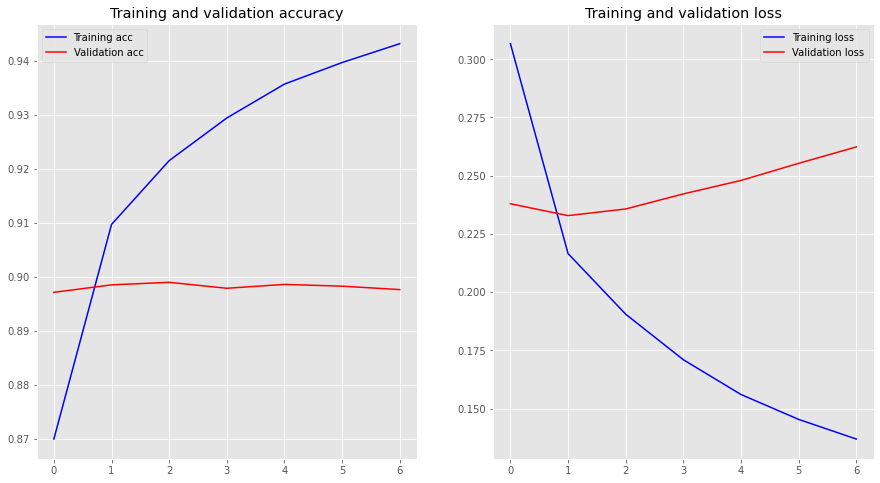

In [15]:
util.plot_accuracy_loss(history, 'CNN')

# **Evaluation**

In [16]:
model = cnn.load_saved_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 122, 100)          20000000  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 122, 100)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 119, 128)          51328     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 20,051,715
Trainable params: 20,051,715
Non-trainable params: 0
_________________________________________________________________


In [17]:
score, acc = model.evaluate(test_converted, target_converted_test, verbose = 2, batch_size = BATCH_SIZE)
print("The loss of this model: %.2f" % (score))
print("The accuracy of this model: %.2f" % (acc))

90/90 - 5s - loss: 0.2294 - acc: 0.9007
The loss of this model: 0.23
The accuracy of this model: 0.90


In [18]:
y_pred = model.predict(test_converted)

Confusion Matrix: 
 [[26587  3340  1049]
 [ 3224 27677   844]
 [  288   355 28294]]


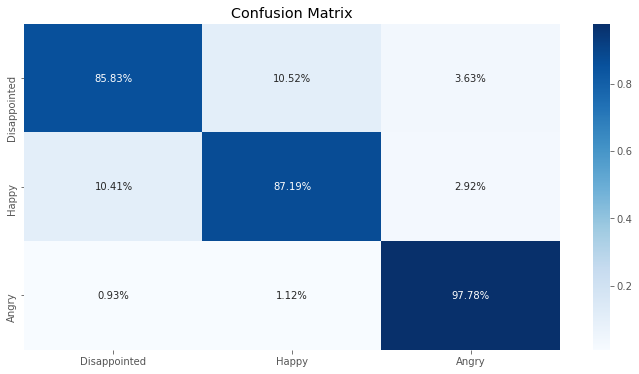

In [19]:
test,pred = util.plot_confusion_matrix(y_pred, target_converted_test, 'CNN')

In [20]:
print("Classification Report: ", classification_report(test, pred))

Classification Report:                precision    recall  f1-score   support

           0       0.88      0.86      0.87     30976
           1       0.88      0.87      0.88     31745
           2       0.94      0.98      0.96     28937

    accuracy                           0.90     91658
   macro avg       0.90      0.90      0.90     91658
weighted avg       0.90      0.90      0.90     91658



# **CNN_v2**

In [21]:
cnn = CNN_Model()
model = cnn.create_model_v2(embed_dim = 100, num_filters = 128, 
                          input_len = train_converted.shape[1], feature = 200000, 
                          drop_out = 0.5, num_words=4)
model.summary()

CNN Model Initialization...
Model Created Successfully...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 122, 100)          20000000  
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 122, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 122, 128)          51328     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 122, 128)          65664     
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 122, 128)          0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
______________________________________________________________

In [22]:
history = model.fit(train_converted, target_converted_train, epochs = EPOCH, 
                    batch_size=BATCH_SIZE, validation_split=0.1,
                    callbacks=cnn.callbacks_v2)

Epoch 1/10
726/726 [==============================] - 413s 568ms/step - loss: 0.4290 - acc: 0.7987 - val_loss: 0.2284 - val_acc: 0.8995

Epoch 00001: val_loss improved from inf to 0.22835, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/CNN_v2/
INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/CNN_v2/assets
Epoch 2/10
726/726 [==============================] - 411s 566ms/step - loss: 0.2142 - acc: 0.9098 - val_loss: 0.2230 - val_acc: 0.9016

Epoch 00002: val_loss improved from 0.22835 to 0.22295, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/CNN_v2/
INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/CNN_v2/assets
Epoch 3/10
726/726 [==============================] - 410s 565ms/step - loss: 0.1875 - acc: 0.9211 - val_loss: 0.2281 - val_acc: 0.9021

Epoch 00003: val_loss did not improve from 0.22295
Epoch 4/10
726/726 [==============================] - 42

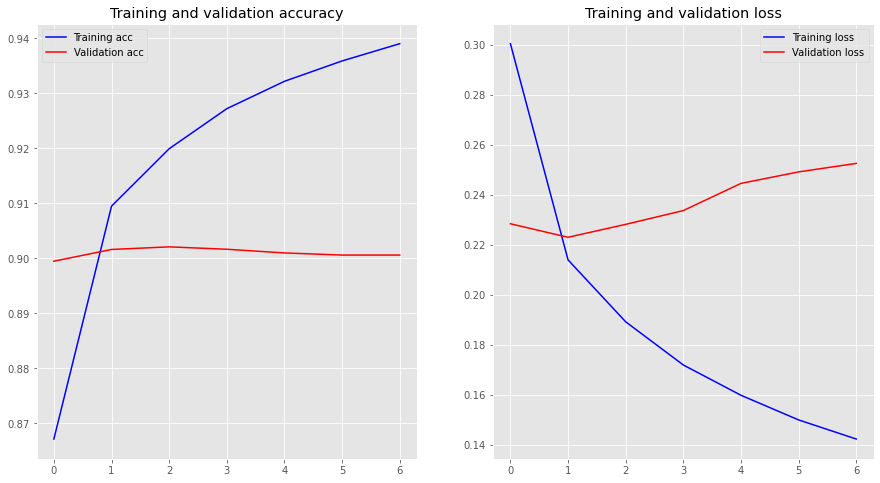

In [23]:
util.plot_accuracy_loss(history, 'CNN_v2')

# **Evaluation**

In [24]:
model = cnn.load_saved_model_v2()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 122, 100)          20000000  
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 122, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 122, 128)          51328     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 122, 128)          65664     
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 122, 128)          0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [25]:
score, acc = model.evaluate(test_converted, target_converted_test, verbose = 2, batch_size = BATCH_SIZE)
print("The loss of this model: %.2f" % (score))
print("The accuracy of this model: %.2f" % (acc))

90/90 - 14s - loss: 0.2217 - acc: 0.9029
The loss of this model: 0.22
The accuracy of this model: 0.90


In [26]:
y_pred = model.predict(test_converted)

Confusion Matrix: 
 [[27185  3763  1184]
 [ 2784 27416   845]
 [  130   193 28158]]


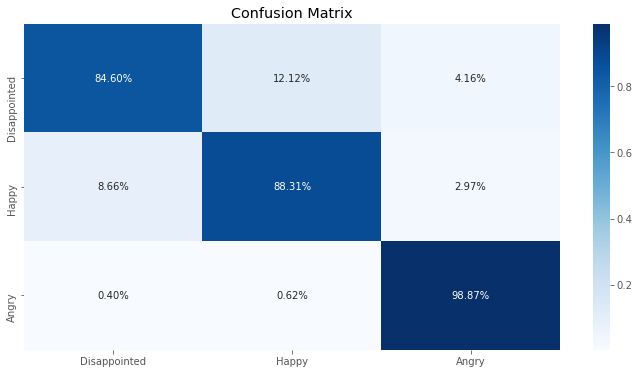

In [27]:
test,pred = util.plot_confusion_matrix(y_pred, target_converted_test, 'CNN_v2')

In [28]:
print("Classification Report: ", classification_report(test, pred))

Classification Report:                precision    recall  f1-score   support

           0       0.90      0.85      0.87     32132
           1       0.87      0.88      0.88     31045
           2       0.93      0.99      0.96     28481

    accuracy                           0.90     91658
   macro avg       0.90      0.91      0.90     91658
weighted avg       0.90      0.90      0.90     91658



# **LSTM Model**

In [29]:
lstm = LSTM_Model()
model = lstm.create_model(embed_dim = 100, lstm_out = 64, 
                          input_len = train_converted.shape[1], feature = 200000, 
                          drop_out = 0.5)
model.summary()

LSTM Model Initialization...
Model Created Successfully...
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 122, 100)          20000000  
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 122, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                42240     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 20,042,435
Trainable params: 20,042,435
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(train_converted, target_converted_train, epochs = EPOCH, 
                    batch_size= BATCH_SIZE, validation_split=0.1,
                    callbacks=lstm.callbacks)

Epoch 1/10
726/726 [==============================] - 744s 1s/step - loss: 0.5102 - acc: 0.7755 - val_loss: 0.2445 - val_acc: 0.8937

Epoch 00001: val_loss improved from inf to 0.24454, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/LSTM/
INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/LSTM/assets
Epoch 2/10
726/726 [==============================] - 722s 994ms/step - loss: 0.2360 - acc: 0.9010 - val_loss: 0.2303 - val_acc: 0.8992

Epoch 00002: val_loss improved from 0.24454 to 0.23033, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/LSTM/
INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/LSTM/assets
Epoch 3/10
726/726 [==============================] - 692s 953ms/step - loss: 0.2094 - acc: 0.9125 - val_loss: 0.2287 - val_acc: 0.8993

Epoch 00003: val_loss improved from 0.23033 to 0.22865, saving model to /Users/pratiksayanekar/Documents/DL_20200161/c

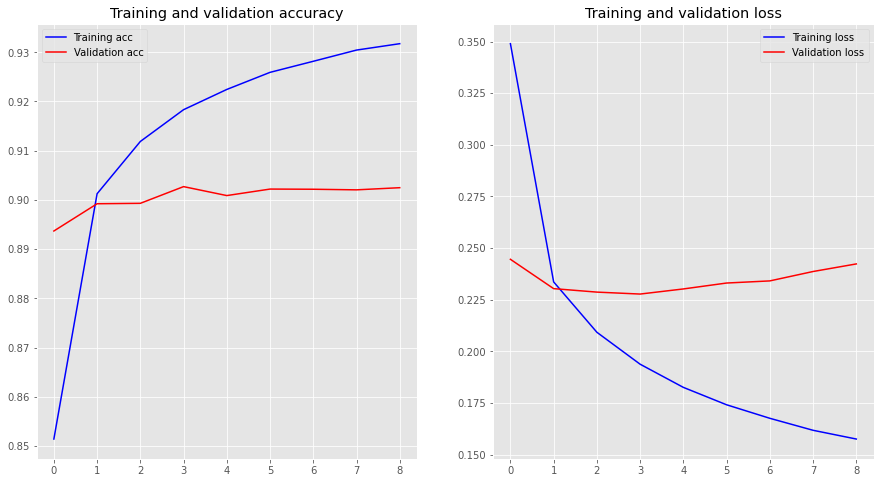

In [31]:
util.plot_accuracy_loss(history, 'LSTM')

# **Evaluation**

In [32]:
model = lstm.load_saved_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 122, 100)          20000000  
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 122, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                42240     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 20,042,435
Trainable params: 20,042,435
Non-trainable params: 0
_________________________________________________________________


In [33]:
score, acc = model.evaluate(test_converted, target_converted_test, verbose = 2, batch_size = BATCH_SIZE)
print("The loss of this model: %.2f" % (score))
print("The accuracy of this model: %.2f" % (acc))

90/90 - 17s - loss: 0.2254 - acc: 0.9030
The loss of this model: 0.23
The accuracy of this model: 0.90


In [34]:
y_pred = model.predict(test_converted)

Confusion Matrix: 
 [[27362  4003  1178]
 [ 2540 27089   689]
 [  197   280 28320]]


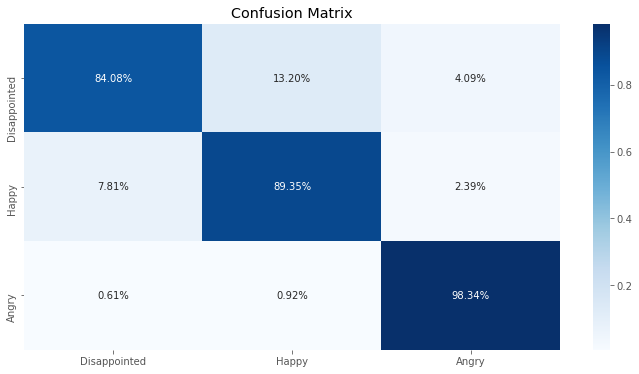

In [35]:
test, pred = util.plot_confusion_matrix(y_pred, target_converted_test, 'LSTM')

In [36]:
print("Classification Report: ", classification_report(test, pred))

Classification Report:                precision    recall  f1-score   support

           0       0.91      0.84      0.87     32543
           1       0.86      0.89      0.88     30318
           2       0.94      0.98      0.96     28797

    accuracy                           0.90     91658
   macro avg       0.90      0.91      0.90     91658
weighted avg       0.90      0.90      0.90     91658



# **LSTM_v2**

In [37]:
lstm = LSTM_Model()
model = lstm.create_model_v2(embed_dim = 100, lstm_out = 64, 
                          input_len = train_converted.shape[1], feature = 200000, 
                          drop_out = 0.5)
model.summary()

LSTM Model Initialization...
Model Created Successfully...
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 122, 100)          20000000  
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 122, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 122, 64)           42240     
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 122, 64)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 122, 64)           33024     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 64)                0         
_____________________________________________________________

In [38]:
history = model.fit(train_converted, target_converted_train, epochs = EPOCH, 
                    batch_size= BATCH_SIZE, validation_split=0.1,
                    callbacks=lstm.callbacks_v2)

Epoch 1/10
726/726 [==============================] - 1193s 2s/step - loss: 0.6454 - acc: 0.6688 - val_loss: 0.2532 - val_acc: 0.8898

Epoch 00001: val_loss improved from inf to 0.25324, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/LSTM_v2/
INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/LSTM_v2/assets
Epoch 2/10
726/726 [==============================] - 1131s 2s/step - loss: 0.2574 - acc: 0.8913 - val_loss: 0.2340 - val_acc: 0.8973

Epoch 00002: val_loss improved from 0.25324 to 0.23403, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/LSTM_v2/
INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/LSTM_v2/assets
Epoch 3/10
726/726 [==============================] - 1121s 2s/step - loss: 0.2301 - acc: 0.9031 - val_loss: 0.2298 - val_acc: 0.8994

Epoch 00003: val_loss improved from 0.23403 to 0.22981, saving model to /Users/pratiksayanekar/Documents/DL_2

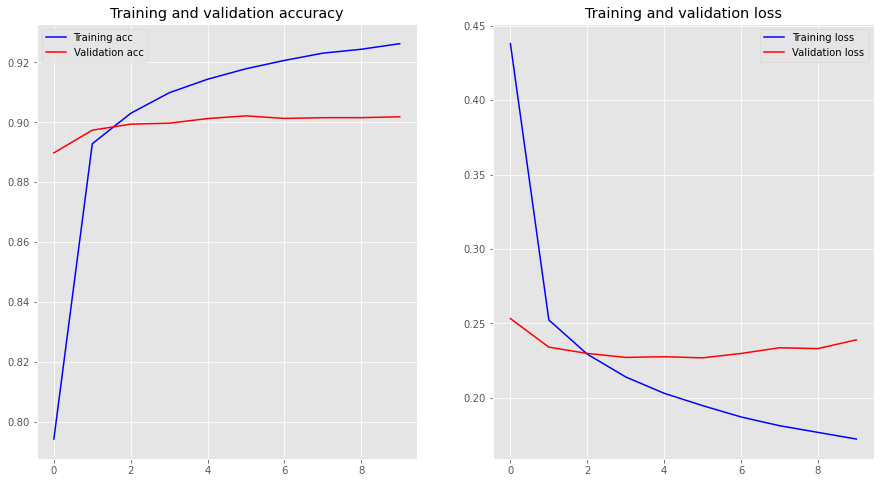

In [39]:
util.plot_accuracy_loss(history, 'LSTM_v2')

# **Evaluation**

In [40]:
model = lstm.load_saved_model_v2()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 122, 100)          20000000  
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 122, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 122, 64)           42240     
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 122, 64)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 122, 64)           33024     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [41]:
score, acc = model.evaluate(test_converted, target_converted_test, verbose = 2, batch_size = BATCH_SIZE)
print("The loss of this model: %.2f" % (score))
print("The accuracy of this model: %.2f" % (acc))

90/90 - 29s - loss: 0.2249 - acc: 0.9031
The loss of this model: 0.22
The accuracy of this model: 0.90


In [42]:
y_pred = model.predict(test_converted)

Confusion Matrix: 
 [[27594  4215  1197]
 [ 2267 26858   667]
 [  238   299 28323]]


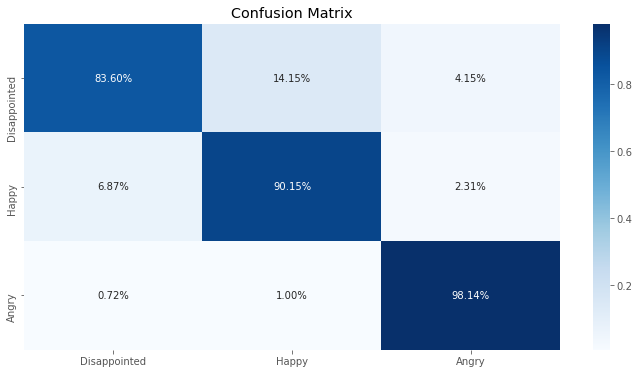

In [43]:
test, pred = util.plot_confusion_matrix(y_pred, target_converted_test, 'LSTM_v2')

In [44]:
print("Classification Report: ", classification_report(test, pred))

Classification Report:                precision    recall  f1-score   support

           0       0.92      0.84      0.87     33006
           1       0.86      0.90      0.88     29792
           2       0.94      0.98      0.96     28860

    accuracy                           0.90     91658
   macro avg       0.90      0.91      0.90     91658
weighted avg       0.90      0.90      0.90     91658



# **Word2Vec Model**

In [73]:
# word2vec = Word2VecModel()
# word2vec_model = word2vec.create_model(X_train)

# I have created a seperate class for word2vec model which has functions to create model and embedding matrix, 
# and it was working perfectly fine until I moved to local machine from colab.
# There was some version mismatch issue, 
# please refer, https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4
# so I have created below additional method which will return the word2vec model.

In [72]:
import numpy as np
from gensim.models import Word2Vec

Embedding_dimensions = 100
def create_word2vec_model(X_train):
    # Creating Word2Vec training dataset.
    Word2vec_train_data = list(map(lambda x: x.split(), X_train))

    word2vec_model = Word2Vec(sentences = Word2vec_train_data, vector_size=Embedding_dimensions,min_count=5)

    print("Vocabulary Length:", len(word2vec_model.wv))
    return word2vec_model

In [74]:
word2vec_model = create_word2vec_model(X_train)

Vocabulary Length: 37148


In [75]:
train_converted, test_converted, tokenizer = util.tokenization_padding_oov_token(X_train, X_test, 60)
print("After Tokenization and Padding...")
print("The shape of train data: ", train_converted.shape)
print("The shape of test data: ", test_converted.shape)

After Tokenization and Padding...
The shape of train data:  (824917, 60)
The shape of test data:  (91658, 60)


In [76]:
vocab_length = len(tokenizer.word_index) + 1
embedding_matrix = word2vec.create_embedding_matrix(vocab_length, tokenizer, word2vec_model)

Embedding Matrix Shape: (170216, 100)


# **BiLSTM**

In [77]:
bi_lstm = BiLSTM_Model()
model = bi_lstm.create_model(embed_dim = 100, lstm_out = 100, input_len = train_converted.shape[1], 
                             feature = vocab_length, drop_out = 0.5, embedding_matrix = embedding_matrix)
model.summary()

BiLSTM Model Initialization...
Model Created Successfully...
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 60, 100)           17021600  
_________________________________________________________________
bidirectional (Bidirectional (None, 60, 200)           160800    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 60, 200)           240800    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 56, 100)           100100    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                1616      
___________________________________________________________

In [78]:
history = model.fit(train_converted, target_converted_train, batch_size=BATCH_SIZE, epochs=EPOCH,
                    validation_split=0.1, callbacks=bi_lstm.callbacks, verbose=1)

Epoch 1/10
726/726 [==============================] - 1533s 2s/step - loss: 0.4677 - acc: 0.7976 - val_loss: 0.2480 - val_acc: 0.8915

Epoch 00001: val_loss improved from inf to 0.24804, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


Epoch 2/10
726/726 [==============================] - 1612s 2s/step - loss: 0.2778 - acc: 0.8785 - val_loss: 0.2435 - val_acc: 0.8934

Epoch 00002: val_loss improved from 0.24804 to 0.24353, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


Epoch 3/10
726/726 [==============================] - 1444s 2s/step - loss: 0.2624 - acc: 0.8838 - val_loss: 0.2376 - val_acc: 0.8948

Epoch 00003: val_loss improved from 0.24353 to 0.23755, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


Epoch 4/10
726/726 [==============================] - 1378s 2s/step - loss: 0.2500 - acc: 0.8891 - val_loss: 0.2330 - val_acc: 0.8967

Epoch 00004: val_loss improved from 0.23755 to 0.23299, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


Epoch 5/10
726/726 [==============================] - 1502s 2s/step - loss: 0.2446 - acc: 0.8908 - val_loss: 0.2299 - val_acc: 0.8975

Epoch 00005: val_loss improved from 0.23299 to 0.22987, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


Epoch 6/10
726/726 [==============================] - 1434s 2s/step - loss: 0.2423 - acc: 0.8920 - val_loss: 0.2303 - val_acc: 0.8974

Epoch 00006: val_loss did not improve from 0.22987
Epoch 7/10
726/726 [==============================] - 1365s 2s/step - loss: 0.2402 - acc: 0.8921 - val_loss: 0.2294 - val_acc: 0.8979

Epoch 00007: val_loss improved from 0.22987 to 0.22938, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


Epoch 8/10
726/726 [==============================] - 1328s 2s/step - loss: 0.2369 - acc: 0.8941 - val_loss: 0.2287 - val_acc: 0.8990

Epoch 00008: val_loss improved from 0.22938 to 0.22865, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


Epoch 9/10
726/726 [==============================] - 1325s 2s/step - loss: 0.2364 - acc: 0.8940 - val_loss: 0.2276 - val_acc: 0.8990

Epoch 00009: val_loss improved from 0.22865 to 0.22756, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


Epoch 10/10
726/726 [==============================] - 1578s 2s/step - loss: 0.2354 - acc: 0.8951 - val_loss: 0.2261 - val_acc: 0.8993

Epoch 00010: val_loss improved from 0.22756 to 0.22612, saving model to /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


INFO:tensorflow:Assets written to: /Users/pratiksayanekar/Documents/DL_20200161/checkpoints/BiLSTM/assets


# **Evaluation**

In [79]:
model = bi_lstm.load_saved_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 60, 100)           17021600  
_________________________________________________________________
bidirectional (Bidirectional (None, 60, 200)           160800    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 60, 200)           240800    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 56, 100)           100100    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                1616      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

In [80]:
score, acc = model.evaluate(test_converted, target_converted_test, verbose = 2, batch_size = BATCH_SIZE)
print("The loss of this model: %.2f" % (score))
print("The accuracy of this model: %.2f" % (acc))

90/90 - 55s - loss: 0.2252 - acc: 0.8985
The loss of this model: 0.23
The accuracy of this model: 0.90


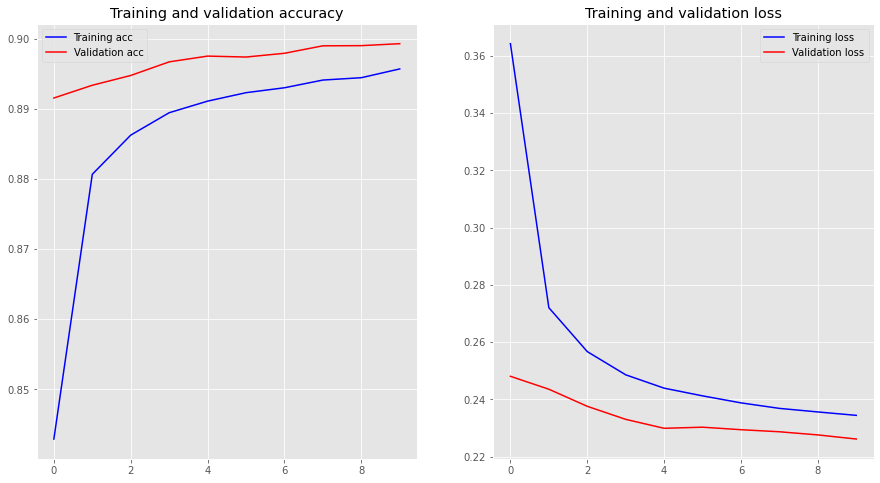

In [81]:
util.plot_accuracy_loss(history, 'BiLSTM')

# **Prediction** 

In [82]:
y_pred = model.predict(test_converted)

Confusion Matrix: 
 [[27316  4306  1250]
 [ 2543 26791   687]
 [  240   275 28250]]


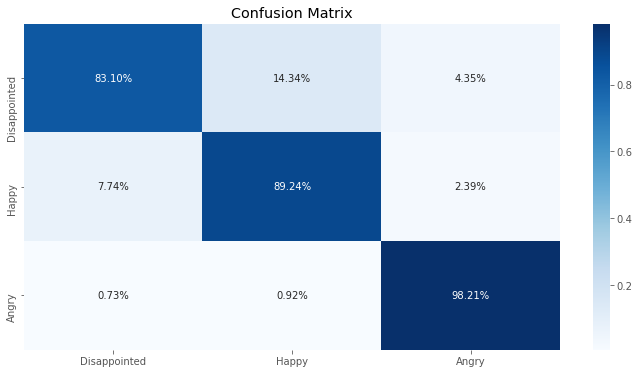

In [83]:
test, pred = util.plot_confusion_matrix(y_pred, target_converted_test, 'BiLSTM')

In [84]:
print("Classification Report: ", classification_report(test, pred))

Classification Report:                precision    recall  f1-score   support

           0       0.91      0.83      0.87     32872
           1       0.85      0.89      0.87     30021
           2       0.94      0.98      0.96     28765

    accuracy                           0.90     91658
   macro avg       0.90      0.90      0.90     91658
weighted avg       0.90      0.90      0.90     91658

